Create a stack from of subtypes maps from all task and trial

In [35]:
import seaborn as sns
import os
import numpy as np
from scipy import stats, integrate
import scipy.io as sio
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import functools
import seaborn as sns

In [2]:
# load good stuff
%matplotlib inline
%load_ext rpy2.ipython
%load_ext oct2py.ipython
sns.set(color_codes=True)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#  Set path
path_root = '/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/'
list_subtype_folder = ['subtype_5_spm_EMOTION_23-May-2017','subtype_5_spm_GAMBLING_19-Jun-2017','subtype_5_spm_LANGUAGE_18-Jun-2017',
                      'subtype_5_spm_MOTOR_19-Jun-2017','subtype_5_spm_RELATIONAL_18-Jun-2017','subtype_5_spm_SOCIAL_18-Jun-2017',
                       'subtype_5_spm_WM_18-Jun-2017']
list_subtype = ['sub1','sub2','sub3','sub4','sub5']

In [8]:
%%octave -o mat_weight
clear
cd /home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_RELATIONAL_18-Jun-2017
mat_weight = load('subtype_weights.mat');
whos

Variables in the current scope:

   Attr Name            Size                     Bytes  Class

   ==== ====            ====                     =====  ===== 

        mat_weight      1x1                      99111  struct

Total is 1 element using 99111 bytes

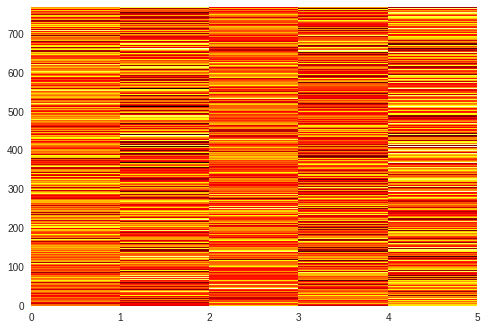

In [9]:
plt.pcolor(mat_weight.weight_mat[:,:,0], cmap='hot')
plt.show()

In [40]:
for cx,folder in enumerate(list_subtype_folder):
    mat_file = os.path.join(path_root,folder,'subtype_weights.mat')
    %octave_push mat_file
    %octave mat_load = load(mat_file);
    %octave_pull mat_load
    list_trial  = mat_load.list_network
    for ix,trial_name in enumerate(list_trial) :
        if np.size(list_trial) == 1:
            subtype = mat_load.weight_mat
        else:
            subtype = mat_load.weight_mat[:,:,ix]
        subtype_name = ['{}_{}'.format(subt,trial_name) for subt in list_subtype ]
        if ix == 0:
            subtype_final = subtype
            subtype_name_final = subtype_name
        else:
            subtype_final = [np.concatenate([subtype_final[x], subtype[x]]) for x in range(np.shape(subtype)[0])]
            subtype_name_final = np.concatenate([subtype_name_final, subtype_name]) 
    # make dataframe
    all_stack_df = pd.DataFrame(subtype_final,columns=subtype_name_final)
    all_stack_df.insert(0, 'ID', mat_load.list_subject)
    all_stack_df.to_csv(os.path.join(path_root,folder,'{}_subtype_stack.csv'.format(''.join(c for c in folder if c.isupper())[:-1]))
                        ,index=False)
    # Merge dataframes
    if cx == 0:
        dfs = all_stack_df
    else:
        dfs = [dfs,all_stack_df]
        dfs = functools.reduce(lambda left,right: pd.merge(left,right,on='ID'), dfs)
# Save final stack
dfs.to_csv(os.path.join(path_root,'pheno/all_subtypes_weights_stack.csv'),index=False)

In [33]:
dfs.describe()

,sub1_fear,sub2_fear,sub3_fear,sub4_fear,sub5_fear,sub1_contrast_loss_event_vs_neut_event,sub2_contrast_loss_event_vs_neut_event,sub3_contrast_loss_event_vs_neut_event,sub4_contrast_loss_event_vs_neut_event,sub5_contrast_loss_event_vs_neut_event,...,sub1_places,sub2_places,sub3_places,sub4_places,sub5_places,sub1_tools,sub2_tools,sub3_tools,sub4_tools,sub5_tools
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,...,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,0.081086,0.024104,-0.070739,0.067987,-0.056673,0.001102,-0.004874,-0.016619,0.017501,-0.005878,...,0.129598,-0.129784,0.128764,-0.096227,0.105651,-0.120539,0.119761,0.115724,-0.042549,-0.101025
std,0.289440,0.195013,0.269756,0.265994,0.237685,0.159292,0.161089,0.132544,0.182372,0.177595,...,0.370122,0.364978,0.368547,0.304825,0.307448,0.333457,0.341976,0.316849,0.184484,0.315380
min,-0.587571,-0.478695,-0.729037,-0.547248,-0.666988,-0.431837,-0.403970,-0.425828,-0.436097,-0.492106,...,-0.710250,-0.905993,-0.705592,-0.748650,-0.596534,-0.832667,-0.688885,-0.655651,-0.534422,-0.825443
25%,-0.128778,-0.119126,-0.253670,-0.135923,-0.228462,-0.109793,-0.120656,-0.104671,-0.110386,-0.131191,...,-0.137487,-0.397489,-0.135320,-0.325678,-0.132004,-0.366424,-0.137374,-0.123261,-0.174458,-0.323719
50%,0.024304,0.020178,-0.045988,0.035454,-0.039900,-0.005582,-0.002120,-0.018831,0.008756,-0.010147,...,0.109422,-0.118556,0.109967,-0.091341,0.107138,-0.086842,0.084449,0.098030,-0.060139,-0.082807
75%,0.271168,0.167268,0.123791,0.259838,0.127836,0.101442,0.097149,0.075079,0.149569,0.123541,...,0.393514,0.127127,0.400403,0.143945,0.340261,0.122007,0.371612,0.352261,0.081043,0.132423
max,0.829241,0.560490,0.567905,0.698187,0.586390,0.474641,0.438156,0.460576,0.493129,0.464442,...,0.923398,0.708611,0.912455,0.625321,0.766154,0.716454,0.862542,0.784398,0.562771,0.604137


In [38]:
dfs.ix[:,1:].describe()

,sub1_fear,sub2_fear,sub3_fear,sub4_fear,sub5_fear,sub1_contrast_loss_event_vs_neut_event,sub2_contrast_loss_event_vs_neut_event,sub3_contrast_loss_event_vs_neut_event,sub4_contrast_loss_event_vs_neut_event,sub5_contrast_loss_event_vs_neut_event,...,sub1_places,sub2_places,sub3_places,sub4_places,sub5_places,sub1_tools,sub2_tools,sub3_tools,sub4_tools,sub5_tools
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,...,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,0.081086,0.024104,-0.070739,0.067987,-0.056673,0.001102,-0.004874,-0.016619,0.017501,-0.005878,...,0.129598,-0.129784,0.128764,-0.096227,0.105651,-0.120539,0.119761,0.115724,-0.042549,-0.101025
std,0.289440,0.195013,0.269756,0.265994,0.237685,0.159292,0.161089,0.132544,0.182372,0.177595,...,0.370122,0.364978,0.368547,0.304825,0.307448,0.333457,0.341976,0.316849,0.184484,0.315380
min,-0.587571,-0.478695,-0.729037,-0.547248,-0.666988,-0.431837,-0.403970,-0.425828,-0.436097,-0.492106,...,-0.710250,-0.905993,-0.705592,-0.748650,-0.596534,-0.832667,-0.688885,-0.655651,-0.534422,-0.825443
25%,-0.128778,-0.119126,-0.253670,-0.135923,-0.228462,-0.109793,-0.120656,-0.104671,-0.110386,-0.131191,...,-0.137487,-0.397489,-0.135320,-0.325678,-0.132004,-0.366424,-0.137374,-0.123261,-0.174458,-0.323719
50%,0.024304,0.020178,-0.045988,0.035454,-0.039900,-0.005582,-0.002120,-0.018831,0.008756,-0.010147,...,0.109422,-0.118556,0.109967,-0.091341,0.107138,-0.086842,0.084449,0.098030,-0.060139,-0.082807
75%,0.271168,0.167268,0.123791,0.259838,0.127836,0.101442,0.097149,0.075079,0.149569,0.123541,...,0.393514,0.127127,0.400403,0.143945,0.340261,0.122007,0.371612,0.352261,0.081043,0.132423
max,0.829241,0.560490,0.567905,0.698187,0.586390,0.474641,0.438156,0.460576,0.493129,0.464442,...,0.923398,0.708611,0.912455,0.625321,0.766154,0.716454,0.862542,0.784398,0.562771,0.604137


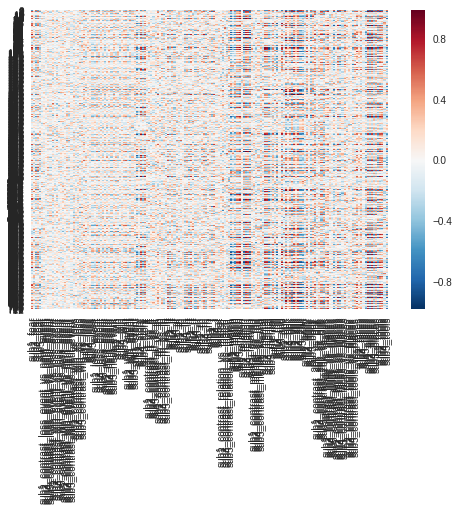

In [39]:
sns.heatmap(dfs.ix[:,1:])

In [29]:
dfs

,ID,sub1_fear,sub2_fear,sub3_fear,sub4_fear,sub5_fear,sub1_contrast_loss_event_vs_neut_event,sub2_contrast_loss_event_vs_neut_event,sub3_contrast_loss_event_vs_neut_event,sub4_contrast_loss_event_vs_neut_event,...,sub1_places,sub2_places,sub3_places,sub4_places,sub5_places,sub1_tools,sub2_tools,sub3_tools,sub4_tools,sub5_tools
0,HCP100307,-0.539191,-0.050346,0.543340,-0.515124,0.280902,-0.006883,-0.033195,0.217270,-0.037873,...,-0.705907,0.706120,-0.704618,0.548155,-0.596534,0.688869,-0.654476,-0.655651,0.235071,0.532026
1,HCP100408,0.652690,0.270182,-0.553928,0.544952,-0.514009,0.098829,-0.181294,-0.039191,0.338578,...,0.885485,-0.843648,0.865490,-0.730005,0.683420,-0.772089,0.788718,0.687622,-0.196060,-0.680310
2,HCP100610,-0.162517,0.041254,0.231615,-0.223435,0.027874,-0.107612,0.020006,0.067681,0.037036,...,-0.458663,0.471580,-0.475810,0.385183,-0.437255,0.528206,-0.526142,-0.526719,0.242560,0.428109
3,HCP101006,0.094900,0.056115,-0.087209,0.109729,-0.099172,-0.345533,0.242849,0.237494,0.193582,...,-0.232383,0.234501,-0.228611,0.148809,-0.170516,0.191484,-0.217785,-0.219396,0.092346,0.217034
4,HCP101309,0.195645,0.321060,-0.084602,0.097719,-0.329707,-0.123095,0.147064,-0.164810,0.006652,...,0.399876,-0.409251,0.412995,-0.346636,0.391033,-0.317192,0.319796,0.304540,-0.080857,-0.291079
5,HCP101410,-0.157573,0.434059,0.307788,-0.342742,-0.191112,-0.043698,0.045379,-0.091122,0.065835,...,0.016755,-0.012646,0.025250,-0.146857,0.149452,-0.237921,0.246734,0.220451,-0.031652,-0.239089
6,HCP101915,-0.076740,0.038146,0.059666,-0.051905,0.018815,-0.212058,0.304149,-0.042539,-0.092489,...,0.230634,-0.226548,0.233133,-0.243807,0.254736,0.106563,-0.137374,0.008411,-0.246832,0.211968
7,HCP102008,0.034056,-0.308265,-0.201405,0.218697,0.204126,0.059195,-0.127881,0.201090,-0.003541,...,-0.017666,-0.026075,-0.008488,0.087685,0.032964,-0.086833,0.062662,0.171429,-0.318369,0.058519
8,HCP102311,0.004662,-0.049337,-0.031461,0.052214,0.019757,0.037495,-0.068099,-0.000969,-0.140081,...,-0.092649,0.093159,-0.100927,0.128262,-0.134601,-0.078190,0.070366,0.057938,0.053598,-0.087779
9,HCP102513,-0.044528,0.128092,0.036287,-0.016679,-0.059597,-0.052988,0.115028,-0.227104,-0.145608,...,0.181341,-0.180674,0.200236,-0.248293,0.249499,0.057418,-0.060408,-0.070910,0.012131,0.070980


In [25]:
dfs_final

,ID,sub1_0bk_x,sub2_0bk_x,sub3_0bk_x,sub4_0bk_x,sub5_0bk_x,sub1_2bk_x,sub2_2bk_x,sub3_2bk_x,sub4_2bk_x,...,sub1_places_y,sub2_places_y,sub3_places_y,sub4_places_y,sub5_places_y,sub1_tools_y,sub2_tools_y,sub3_tools_y,sub4_tools_y,sub5_tools_y
0,HCP100206,-0.211531,-0.133087,-0.067423,0.046880,0.157160,0.349229,0.157197,0.388652,-0.312068,...,0.080345,-0.086040,0.080240,-0.057010,0.081269,-0.099484,0.072327,0.137406,-0.129631,-0.022530
1,HCP100307,0.271820,-0.712437,-0.367810,-0.613751,0.724916,-0.684300,-0.427872,-0.695046,0.680692,...,-0.705907,0.706120,-0.704618,0.548155,-0.596534,0.688869,-0.654476,-0.655651,0.235071,0.532026
2,HCP100408,-0.231657,0.821616,0.377594,0.614532,-0.821420,0.756620,0.410471,0.738286,-0.724200,...,0.885485,-0.843648,0.865490,-0.730005,0.683420,-0.772089,0.788718,0.687622,-0.196060,-0.680310
3,HCP100610,-0.595269,0.608920,0.324160,0.672978,-0.568784,0.530161,0.178725,0.558483,-0.482615,...,-0.458663,0.471580,-0.475810,0.385183,-0.437255,0.528206,-0.526142,-0.526719,0.242560,0.428109
4,HCP101006,0.195067,-0.345047,-0.220223,-0.313938,0.347063,-0.299644,-0.155932,-0.327522,0.238652,...,-0.232383,0.234501,-0.228611,0.148809,-0.170516,0.191484,-0.217785,-0.219396,0.092346,0.217034
5,HCP101107,-0.003291,0.592146,0.344959,0.307568,-0.609180,0.467691,0.242170,0.492309,-0.421238,...,0.391419,-0.377087,0.416438,-0.412169,0.368058,-0.410026,0.454200,0.307015,0.104717,-0.488908
6,HCP101309,-0.054542,0.334206,0.158892,0.233317,-0.340753,0.188548,0.089394,0.198918,-0.153233,...,0.399876,-0.409251,0.412995,-0.346636,0.391033,-0.317192,0.319796,0.304540,-0.080857,-0.291079
7,HCP101410,0.162998,-0.074092,0.156797,-0.180133,0.037320,0.029701,0.151279,0.028431,-0.076938,...,0.016755,-0.012646,0.025250,-0.146857,0.149452,-0.237921,0.246734,0.220451,-0.031652,-0.239089
8,HCP101915,-0.409693,0.100084,0.012231,0.283126,-0.053860,-0.269490,-0.247773,-0.271765,0.259525,...,0.230634,-0.226548,0.233133,-0.243807,0.254736,0.106563,-0.137374,0.008411,-0.246832,0.211968
9,HCP102008,-0.001416,-0.215477,-0.203491,-0.113276,0.237419,0.077632,0.202575,0.048401,-0.075824,...,-0.017666,-0.026075,-0.008488,0.087685,0.032964,-0.086833,0.062662,0.171429,-0.318369,0.058519


110
down vote
Assumed imports:

import pandas as pd
John Galt's answer is basically a reduce operation. If I have more than a handful of dataframes, I'd put them in a list like this (generated via list comprehensions or loops or whatnot):

dfs = [df0, df1, df2, dfN]
Assuming they have some common column, like name in your example, I'd do the following:

df_final = reduce(lambda left,right: pd.merge(left,right,on='name'), dfs)
That way, your code should work with whatever number of dataframes you want to merge.

Edit August 1, 2016: For those using Python 3: reduce has been moved into functools. So to use this function, you'll first need to import that module.

In [127]:
all_stack_df.loc[:,'IDs'] = mat_load.list_subject

In [8]:
# Make matrix out of the remaining guys except subject ID column
stack_mat = all_stack_df.as_matrix()
# Normalize these guys by column
stack_norm = (stack_mat - np.mean(stack_mat, 0))/np.std(stack_mat, 0)

In [10]:
# Save normalized pheno to be used in octave for bootsrap analysis
ind = all_stack_df.index
stack_norm_df = pd.DataFrame(stack_norm, columns=all_stack_df.columns.get_values(),index=ind)

In [13]:
# save final stack
stack_norm_df.to_csv(os.path.join(path_root,'pheno/all_subtype_stack.csv'),index=False)